# Análisis Exploratorio de Datos (EDA)
Hackathon: [Brewing Data Cup 2020](https://www.brewingdatacup.com)  
Team: OrozCuspi Data_MX  
Authors: [Felipe Orozco](https://github.com/felipeoh) y [Victor Cuspinera](https://github.com/vcuspinera)  

## 1. Descripción de base de datos
El reto para los participantes en México es un problema de **logística**, para revisar la distribución -entregas- de producto de Grupo Modelo a su clientes durante una semana. La información compartida es una base de datos anonimizada que incluye un identificador para cliemntes, agencia, freciencia (la cuals e traduce en número de días que se atiende al cliente en una semana), volumen de entrega por evento, y georreferenciación (latitud y longitud).

## 2. Importar el dataset
### Load packages

In [35]:
import pandas as pd
import numpy as np
import altair as alt
import vega

# add this to render images in github
alt.renderers.enable('jupyterlab')
# alt.renderers.enable('default')

RendererRegistry.enable('jupyterlab')

### Load dataset

In [36]:
data = pd.read_csv("../data/ubicaciones.csv")

# vista
data.tail()

,Id_Cliente,id_Agencia,Frecuencia,Vol_Entrega,lat,lon
3620,3621,A1,1,15.0,20.558651,-98.149706
3621,3622,A1,1,2.0,20.541300,-98.157300
3622,3623,A1,1,6.0,20.509200,-98.128000
3623,3624,A1,1,31.0,20.513400,-98.154500
3624,3625,A1,2,18.5,20.521772,-98.166209


## 3. Exploración 

In [37]:
# variables
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3625 entries, 0 to 3624
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Id_Cliente   3625 non-null   int64  
 1   id_Agencia   3625 non-null   object 
 2   Frecuencia   3625 non-null   int64  
 3   Vol_Entrega  3625 non-null   float64
 4   lat          3625 non-null   float64
 5   lon          3625 non-null   float64
dtypes: float64(3), int64(2), object(1)
memory usage: 170.0+ KB


In [38]:
# estadísticas básicas
data.describe()

,Id_Cliente,Frecuencia,Vol_Entrega,lat,lon
count,3625.000000,3625.000000,3625.000000,3625.000000,3625.000000
mean,1813.000000,1.097103,13.195724,20.508669,-98.189818
std,1046.591691,0.319449,20.158246,0.034647,0.044283
min,1.000000,1.000000,0.000000,20.435038,-98.298948
25%,907.000000,1.000000,2.000000,20.480661,-98.221491
50%,1813.000000,1.000000,6.000000,20.507537,-98.183900
75%,2719.000000,1.000000,15.000000,20.537206,-98.153300
max,3625.000000,3.000000,175.000000,20.608307,-98.108122


In [39]:
# generales 1/2
print("Nombre de VAERIABLES:", list(data.columns), "\n")
print("Número de CLIENTES distintos:", len(data["Id_Cliente"].unique()), "\n")
print("Número de AGENCIAS distintas:", len(data["id_Agencia"].unique()))
print("AGENCIAS distintas:", list(data["id_Agencia"].unique()), "\n")
my_freq = {}

print("Distribución de variable 'Frecuencia':")
for i in list(data["Frecuencia"].unique()):
    my_freq[i] = sum(data["Frecuencia"] == i)
pd.DataFrame(index=my_freq.keys(), data=my_freq.values()).sort_index(). \
    reset_index().rename(columns = {"index":"frecuencia", 0:"observaciones"})

Nombre de VAERIABLES: ['Id_Cliente', 'id_Agencia', 'Frecuencia', 'Vol_Entrega', 'lat', 'lon'] 

Número de CLIENTES distintos: 3625 

Número de AGENCIAS distintas: 1
AGENCIAS distintas: ['A1'] 

Distribución de variable 'Frecuencia':


,frecuencia,observaciones
0,1,3299
1,2,300
2,3,26


In [40]:
# generales 2/2
print("Cuadro de georreferenciación:")
latitud = [min(data.lat), max(data.lat)]
longitud = [min(data.lon), max(data.lon)]
pd.DataFrame([latitud, longitud], index=["latitud", "longitud"], columns=["min", "max"])

Cuadro de georreferenciación:


,min,max
latitud,20.435038,20.608307
longitud,-98.298948,-98.108122


In [41]:
# revisar si hay NaN values en la base de datos
data.isnull().values.any()

False

-> no se encontraron NaN.

## 4. Visualizaciones

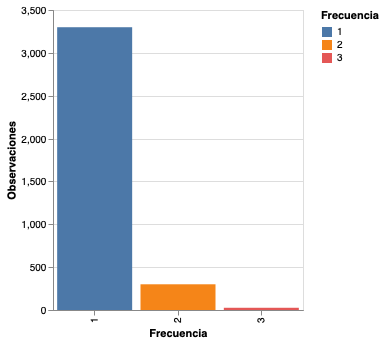

In [42]:
# Frecuencia
alt.Chart(data).mark_bar().encode(
    alt.X("Frecuencia:N"),  #bin=True
    alt.Y('count()', title="Observaciones"),
    color="Frecuencia:N",
    tooltip=["Frecuencia", "count()"]
).properties(
    width=250
)


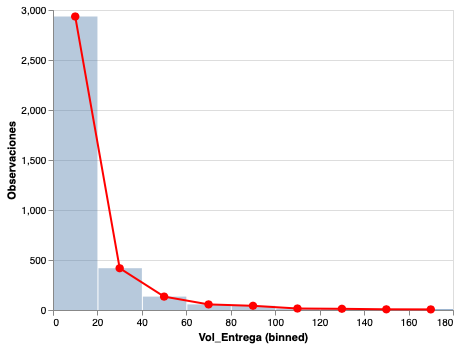

In [43]:
# Volumen de entrega
base = alt.Chart(data).encode(
    alt.X("Vol_Entrega", bin=True),  #
    alt.Y('count()', title="Observaciones"),
    tooltip=["count()"]
)

vol_bar = base.mark_bar(opacity=0.4)
vol_line = base.mark_line(color="red")
vol_point = base.mark_circle(color="red", size=70)

vol_bar + vol_line + vol_point


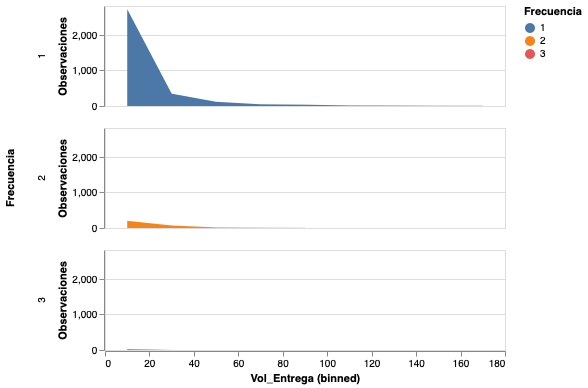

In [44]:
# Volumen de entrega por Frecuencia
alt.Chart(data).mark_area().encode(
    alt.X("Vol_Entrega", bin=True),  #
    alt.Y('count()', title="Observaciones"),
    alt.Row("Frecuencia:N"),
    alt.Color("Frecuencia:N"),
    tooltip=["count()"]
).properties(
    height=100
)


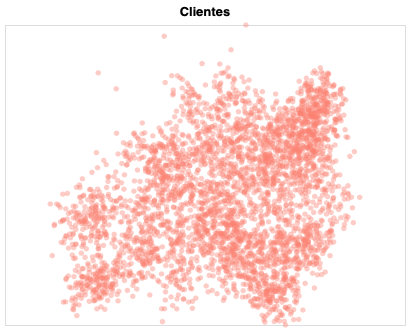

In [52]:
# Georreferenciación

alt.Chart(data).mark_circle(opacity=0.4, color="salmon").encode(
    longitude='lon',
    latitude='lat',
#     size='count()'
#     size=alt.Size('count:Q', title='Number of Airports'),
#     color=alt.value('steelblue'),
    tooltip=['lat','lon']
).properties(
    title='Clientes'
)

In [46]:
# TODO <-  Tratar de hacer la georeferenciación en un mapa para visualizarlo mejor